In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline

from numpy import log
from pandas import Series
from datetime import datetime

pd.set_option("max_columns",None)

In [114]:
# always take data in squeance order when doing timeseires

In [115]:
df = pd.read_csv('Super_Store.csv', encoding='unicode_escape', parse_dates=['Order Date']).sort_values('Order Date')

In [116]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1577,7475,CA-2014-167199,2014-01-06,1/10/2014,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
1626,7661,CA-2014-105417,2014-01-07,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
181,867,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
150,717,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
631,2979,CA-2014-109232,2014-01-13,1/16/2014,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 1577 to 186
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   object        
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121

In [118]:
df['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

In [119]:
df_new = df[df['Category']== 'Furniture'][['Order Date','Sales']].sort_values('Order Date')
#df_new = df[df['Category']== 'Furniture'][['Order Date','Sales']].sort_values('Order Date').set_index('Order Date')

In [120]:
df_new.head()

,Order Date,Sales
1577,2014-01-06,2573.820
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
631,2014-01-13,545.940


In [121]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 1577 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.7 KB


In [122]:
df_new[df_new.duplicated()]

,Order Date,Sales
719,2014-04-23,281.372
1759,2015-07-05,4.928
1238,2016-07-04,25.400


In [123]:

df_new[df_new['Order Date']== '2014-04-23' ]

,Order Date,Sales
720,2014-04-23,281.372
719,2014-04-23,281.372
721,2014-04-23,22.336


In [124]:
# 719 and 720 have same values 
# dropping duplicates

In [125]:
df_new = df_new.drop_duplicates()

In [126]:
df_new.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [127]:
df_new.set_index('Order Date',inplace = True)

In [128]:
# resample the data at a monthly frequency, with 'MS' standing for 'Month Start' 
# which means the resampling starts at the beginning of each month.
Sales =  df_new['Sales'].resample('MS').mean()
df_monthly = pd.DataFrame(Sales)

In [129]:
df_monthly.head()

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,306.538600
2014-05-01,288.032792


In [130]:
#df_monthly = df_new

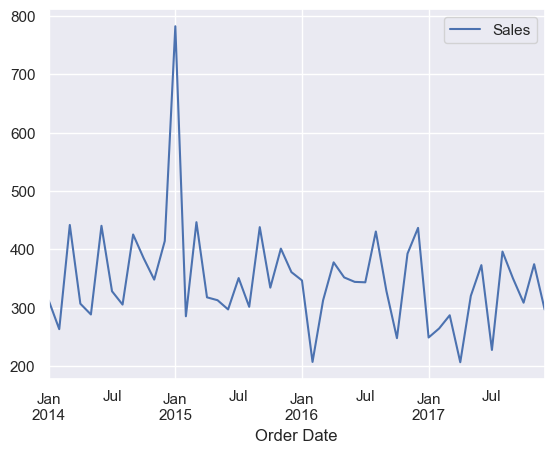

In [131]:
# taking monthly sales
df_monthly.plot()

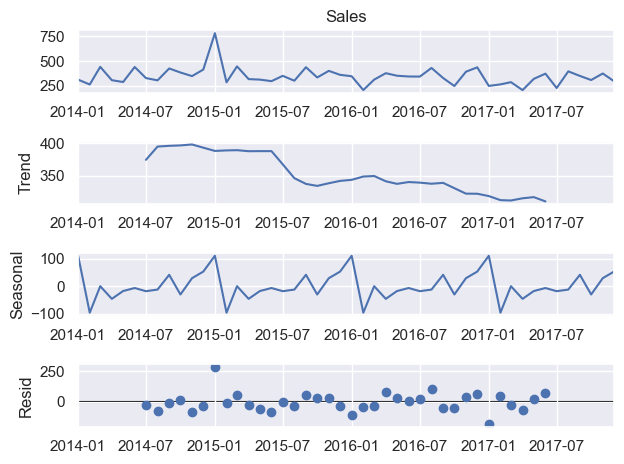

In [132]:
# Decomposition to check dataset pattern/component

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_monthly['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()

In [133]:
# Check whether autocorrelation there in the dataset or not ?
# Positive Autocorrelation found 

import statsmodels.api as sm
sm.stats.durbin_watson(df_monthly['Sales'])

0.12747616458687813

### Augmented Dickey Fuller Test 
TO check time series is sationary or not

In [134]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_monthly['Sales'])


(-6.965434734359824,
 8.940263935581452e-10,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 446.4961180697177)

In [135]:
# for readbility purpose
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("***************Augmented Dickey Fuller Test***************")
    labels = ['ADF Stats Test','p-value','#Lags','No. of obs']
    
    for a, b in zip(result, labels):
        print(b + " : "+ str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Week evidence against null hypothesis and my timeseries is Non-Stationary")    

In [136]:
adf_check(df_monthly['Sales'])

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -6.965434734359824
p-value : 8.940263935581452e-10
#Lags : 0
No. of obs : 47
Strong evidence against null hypothesis and my timeseries is Stationary


In [137]:
df_monthly['1stDiff'] = df_monthly-df_monthly.shift(1)

In [138]:
adf_check(df_monthly['1stDiff'].dropna())
# pvalue greater than 0.5 therefore again take diff

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -9.198411777951343
p-value : 2.0329347449148744e-15
#Lags : 1
No. of obs : 45
Strong evidence against null hypothesis and my timeseries is Stationary


In [139]:
df_monthly['2ndDiff'] = df_monthly['1stDiff']-df_monthly['1stDiff'].shift(1)

In [140]:
adf_check(df_monthly['2ndDiff'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -4.920586952314553
p-value : 3.179537770839515e-05
#Lags : 10
No. of obs : 35
Strong evidence against null hypothesis and my timeseries is Stationary


In [141]:
df_monthly['3rdDiff'] = df_monthly['2ndDiff'] - df_monthly['2ndDiff'].shift(1)

In [142]:
adf_check(df_monthly['3rdDiff'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -4.32514324593108
p-value : 0.0004017250516288419
#Lags : 10
No. of obs : 34
Strong evidence against null hypothesis and my timeseries is Stationary


In [143]:
# d = 3
# p = 2
# q = 1
# P =
# D = 2
# Q =

In [144]:
df_monthly.head()

,Sales,1stDiff,2ndDiff,3rdDiff
Order Date,,,,
2014-01-01,312.126250,NaN,NaN,NaN
2014-02-01,262.808286,-49.317964,NaN,NaN
2014-03-01,441.635030,178.826745,228.144709,NaN
2014-04-01,306.538600,-135.096430,-313.923175,-542.067884
2014-05-01,288.032792,-18.505808,116.590622,430.513797


In [145]:
# Seasonality
df_monthly['Seasonality'] = df_monthly['Sales'] - df_monthly['Sales'].shift(12)

In [146]:
adf_check(df_monthly['Seasonality'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -6.93300164186601
p-value : 1.0721242219327991e-09
#Lags : 0
No. of obs : 35
Strong evidence against null hypothesis and my timeseries is Stationary


In [147]:
df_monthly['Seasonality_1'] = df_monthly['Seasonality'] - df_monthly['Seasonality'].shift(12)

In [148]:
adf_check(df_monthly['Seasonality_1'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -6.537766349148544
p-value : 9.513647554130658e-09
#Lags : 0
No. of obs : 23
Strong evidence against null hypothesis and my timeseries is Stationary


In [149]:
df_monthly['Seasonality_2'] = df_monthly['Seasonality_1'] - df_monthly['Seasonality_1'].shift(12)

In [150]:
adf_check(df_monthly['Seasonality_2'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -0.6828532124317932
p-value : 0.8511410917621225
#Lags : 4
No. of obs : 7
Week evidence against null hypothesis and my timeseries is Non-Stationary


In [151]:
df_monthly['Seasonality_3'] = df_monthly['Seasonality_2'] - df_monthly['Seasonality_2'].shift(12)

In [152]:
#adf_check(df_monthly['Seasonality_3'].dropna())

ValueError: sample size is too short to use selected regression component

In [ ]:
#Since our data points are less we will be going with D =2 

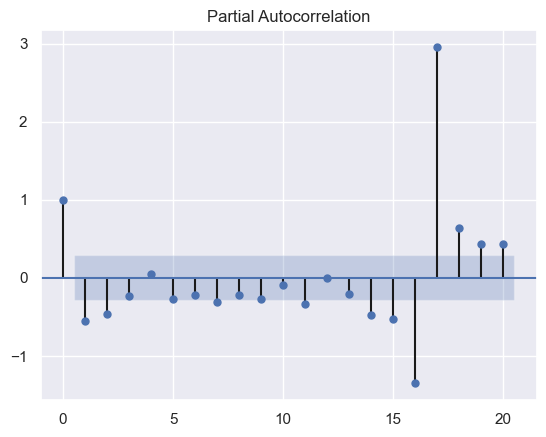

In [153]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df_monthly['1stDiff'].dropna(), lags=20)
plt.show()


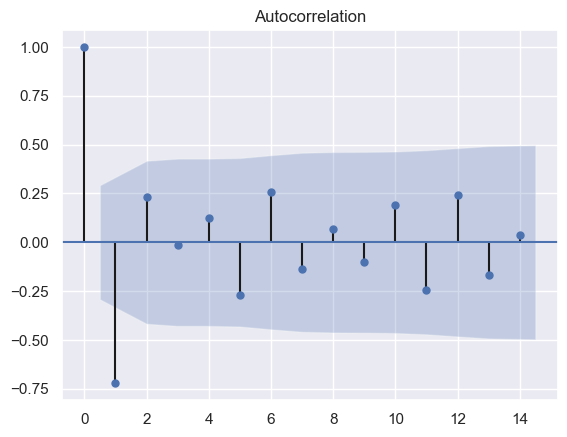

In [154]:
plot_acf(df_monthly['3rdDiff'].dropna(), lags=14)
plt.show()

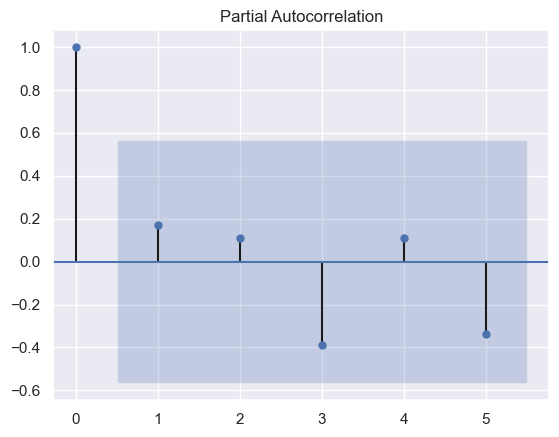

In [155]:
# Seasonality
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df_monthly['Seasonality_2'].dropna(), lags=5)
plt.show()


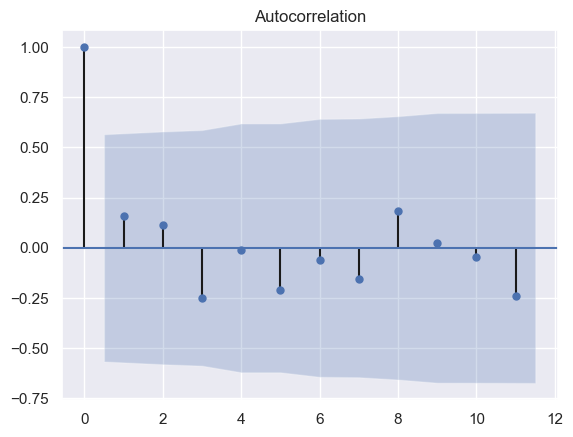

In [156]:
plot_acf(df_monthly['Seasonality_2'].dropna(), lags=11)
plt.show()

In [157]:
# d = 3
# p = 2
# q = 1
# P = 0
# D = 2
# Q = 0

## ARIMA MODEL

In [158]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [159]:
model = sm.tsa.statespace.SARIMAX(df_monthly['Sales'],
                             order =(0,1,1), seasonal_order=(1,2,0,12))

result = model.fit()
print(result.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(1, 2, [], 12)   Log Likelihood                -154.713
Date:                             Wed, 20 Sep 2023   AIC                            315.425
Time:                                     23:20:56   BIC                            318.832
Sample:                                 01-01-2014   HQIC                           316.282
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6683      0.204     -3.271      0.001      -1.069      -0.268
ar.S.L12      -0.6500      

In [160]:
len(df_monthly)

48

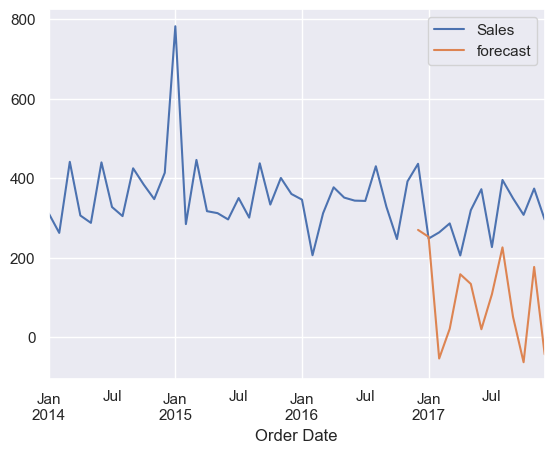

In [161]:
# forecast with the existing data before prediction the future time
df_monthly['forecast'] = result.predict(start=35, end = 48, dynamic=True)
df_monthly[['Sales','forecast']].plot()
plt.show()

In [162]:
df_monthly.tail()

,Sales,1stDiff,2ndDiff,3rdDiff,Seasonality,Seasonality_1,Seasonality_2,Seasonality_3,forecast
Order Date,,,,,,,,,
2017-08-01,395.945487,168.771987,314.315873,512.623218,-34.510799,-163.761079,-296.819790,NaN,226.419004
2017-09-01,349.737422,-46.208065,-214.980053,-529.295926,21.268977,130.684249,252.688938,NaN,51.544501
2017-10-01,308.226313,-41.511109,4.696956,219.677009,60.880959,147.608479,183.901156,NaN,-62.599506
2017-11-01,374.310253,66.083940,107.595049,102.898092,-18.080226,-9.420933,52.467606,NaN,177.149920
2017-12-01,296.296857,-78.013396,-144.097336,-251.692385,-140.354512,-216.289956,-345.644158,NaN,-42.833145


## Auto Approch 
to find PDQ Value

In [163]:
import itertools 

p= d =q = range(0,4)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

print('Few Parameter combination are:')
print('{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('{} x {}'.format(pdq[2],seasonal_pdq[2]))
print('{} x {}'.format(pdq[0],seasonal_pdq[1]))

Few Parameter combination are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 0, 2) x (0, 0, 2, 12)
(0, 0, 0) x (0, 0, 1, 12)


In [ ]:
"""
for param_trend in pdq: 
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df_monthly['Sales'],order =param_trend, 
                                              seasonal_order=param_seasonal,
                                              enforce_stationarity = False,
                                              enforce_invertibility= False)
            result = model.fit()
            print("ARIMA{}x{} - AIC : {}".format(param_trend,param_seasonal,result.aic))
        except:
            continue
            
"""

In [169]:
#sm.tsa.statespace.SARIMAX()
# the pdq and PDQ value used below are the output of automation

In [164]:
model = sm.tsa.statespace.SARIMAX(df_monthly['Sales'],
                             order =(0,0,0), seasonal_order=(1,3,0,12))

result = model.fit()
print(result.summary())

                                SARIMAX Results                                 
Dep. Variable:                    Sales   No. Observations:                   48
Model:             SARIMAX(1, 3, 0, 12)   Log Likelihood                 -87.685
Date:                  Wed, 20 Sep 2023   AIC                            179.369
Time:                          23:21:25   BIC                            180.339
Sample:                      01-01-2014   HQIC                           179.010
                           - 12-01-2017                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.9981      0.001  -1750.710      0.000      -0.999      -0.997
sigma2       765.1906   1.44e-09   5.32e+11      0.000     765.191     765.191
Ljung-Box (L1) (Q):                 

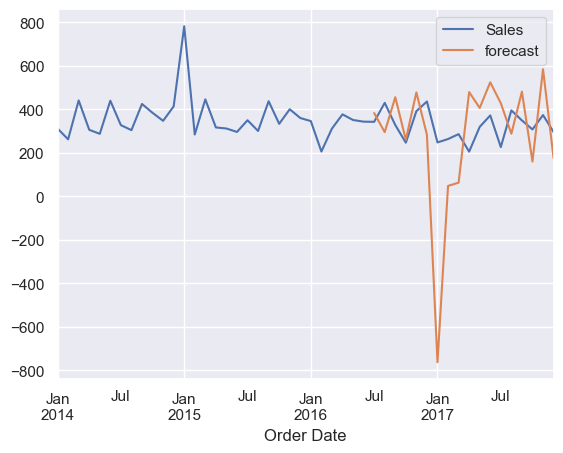

In [165]:
# forecast with the existing data before prediction the future time
df_monthly['forecast'] = result.predict(start=30, end = 48, dynamic=True)
df_monthly[['Sales','forecast']].plot()
plt.show()

In [166]:
df_monthly.tail()

,Sales,1stDiff,2ndDiff,3rdDiff,Seasonality,Seasonality_1,Seasonality_2,Seasonality_3,forecast
Order Date,,,,,,,,,
2017-08-01,395.945487,168.771987,314.315873,512.623218,-34.510799,-163.761079,-296.819790,NaN,288.451666
2017-09-01,349.737422,-46.208065,-214.980053,-529.295926,21.268977,130.684249,252.688938,NaN,481.887253
2017-10-01,308.226313,-41.511109,4.696956,219.677009,60.880959,147.608479,183.901156,NaN,160.472075
2017-11-01,374.310253,66.083940,107.595049,102.898092,-18.080226,-9.420933,52.467606,NaN,585.237418
2017-12-01,296.296857,-78.013396,-144.097336,-251.692385,-140.354512,-216.289956,-345.644158,NaN,176.853091


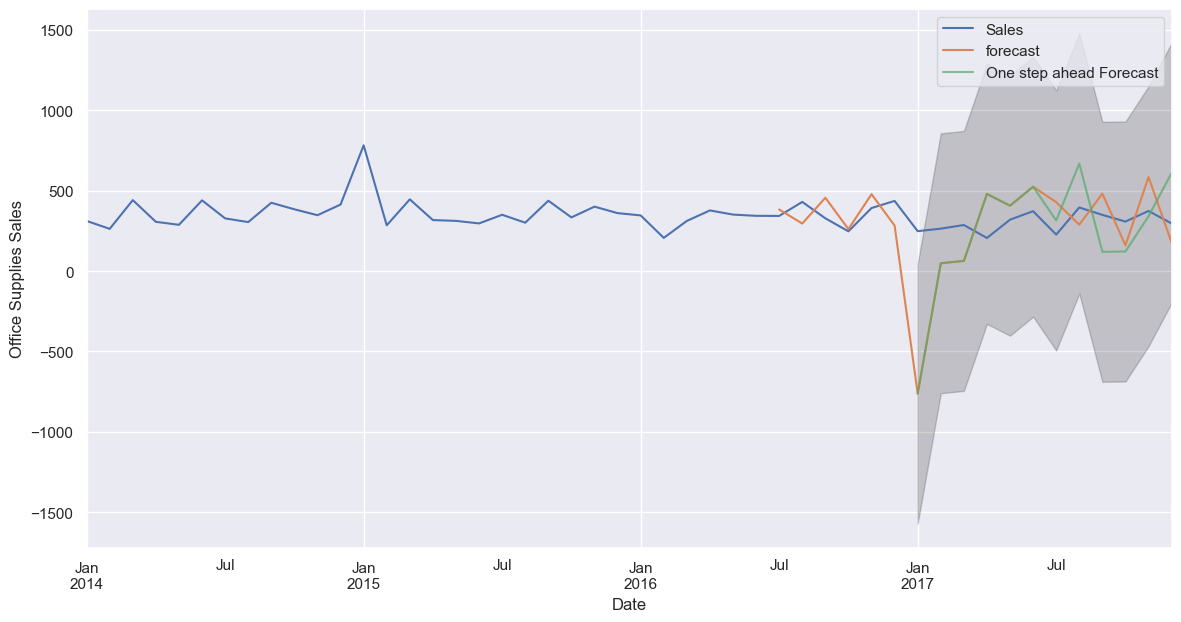

In [168]:
import matplotlib.pyplot as plt

# Assuming df_monthly contains 'Sales' and 'forecast' columns
# If not, make sure df_monthly is defined with these columns

df_monthly = df_monthly.loc[:,['Sales','forecast']]
ax = df_monthly['2014':].plot(label='Observed')

# Plot one-step-ahead forecast
pred_os.predicted_mean.plot(ax=ax, label='One step ahead Forecast', alpha=0.7, figsize=(14, 7))

# Plot confidence interval
ax.fill_between(pred_ci_os.index, pred_ci_os.iloc[:, 0], pred_ci_os.iloc[:, 1], color='k', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()


## FACEBOOK PROPHIT MODEL

In [186]:
#!pip install pystan

In [187]:
#!python -m pip install prophet


In [ ]:
df-prophet = df_monthly.loc[:,['Order Date','Sales']]

In [196]:
df_prophet.reset_index(inplace = True)

In [216]:
df_prophet = df_prophet.rename(columns={'Order Date':'ds', 'Sales':'y'})
df_prophet

,ds,y
0,2014-01-01,312.126250
1,2014-02-01,262.808286
2,2014-03-01,441.635030
3,2014-04-01,306.538600
4,2014-05-01,288.032792
5,2014-06-01,440.204187
6,2014-07-01,327.910636
7,2014-08-01,305.014438
8,2014-09-01,425.294300
9,2014-10-01,384.507719


In [198]:
from prophet import Prophet
m = Prophet()
model = m.fit(df_prophet)

00:31:11 - cmdstanpy - INFO - Chain [1] start processing
00:31:11 - cmdstanpy - INFO - Chain [1] done processing


In [199]:
future_pred = model.make_future_dataframe(periods=100, freq='D')

In [200]:
future_pred

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
...,...
143,2018-03-07
144,2018-03-08
145,2018-03-09
146,2018-03-10


In [201]:
prediction = model.predict(future_pred)

In [202]:
prediction.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,374.195768,347.330867,509.057279,374.195768,374.195768,51.181371,51.181371,51.181371,51.181371,51.181371,51.181371,0.0,0.0,0.0,425.377139
1,2014-02-01,372.479795,219.179313,385.466294,372.479795,372.479795,-69.786067,-69.786067,-69.786067,-69.786067,-69.786067,-69.786067,0.0,0.0,0.0,302.693728


In [203]:
prediction[['ds', 'yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
138,2018-03-02,193.272742,104.507346,276.609877
139,2018-03-03,48.322184,-25.142045,133.740325
140,2018-03-04,-93.522458,-180.255057,-9.359705
141,2018-03-05,-230.224203,-315.152686,-147.241917
142,2018-03-06,-359.820951,-442.661860,-276.360274
143,2018-03-07,-480.463145,-563.054974,-399.526650
144,2018-03-08,-590.449958,-676.262194,-509.748341
145,2018-03-09,-688.263102,-767.716882,-605.001109
146,2018-03-10,-772.597417,-853.757714,-685.864430
147,2018-03-11,-842.387443,-924.276493,-759.362305


In [204]:
len(prediction)

148

In [205]:
prediction.to_csv('covid_prediction_dataset.csv')

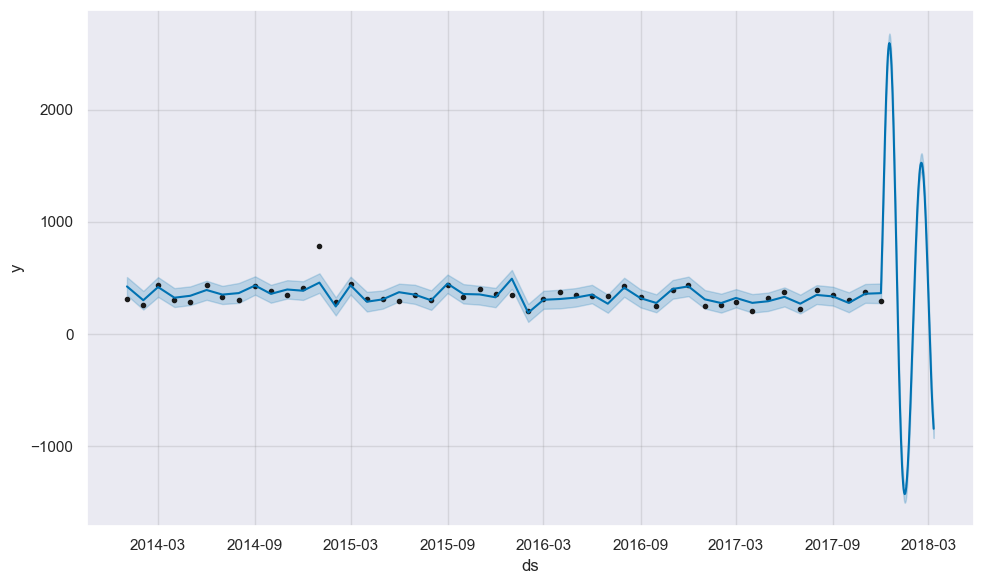

In [206]:
# plot the model
model.plot(prediction)
plt.show()

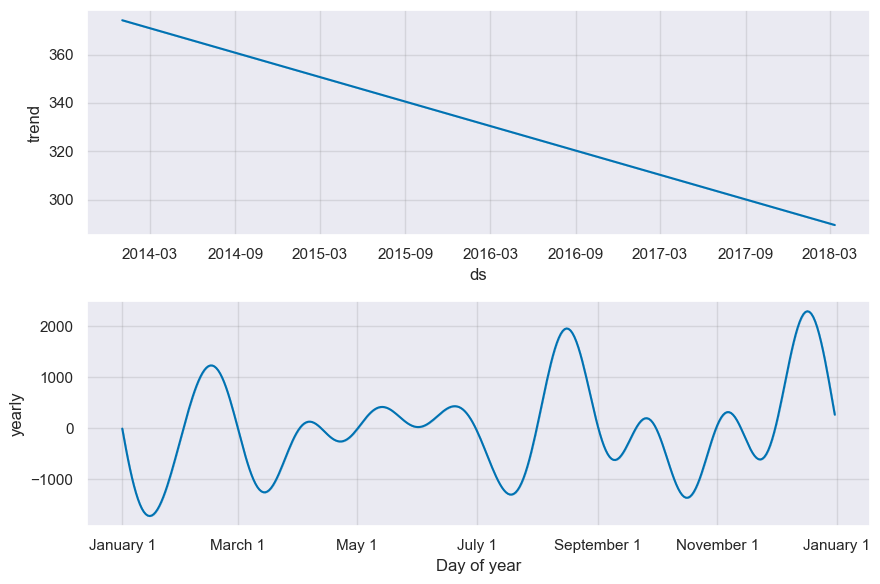

In [207]:
model.plot_components(prediction)
plt.show()

In [229]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      48 non-null     datetime64[ns]
 1   y       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


In [236]:

forecast = model.predict(df_prophet)


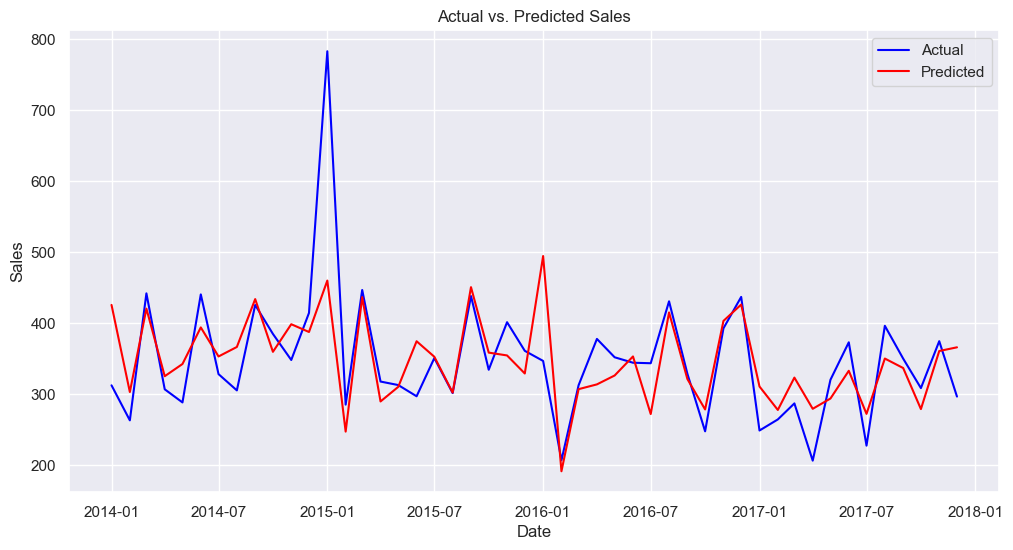

In [237]:
import numpy as np

actual_sales = df_prophet['y'].values  # Convert actual sales to a NumPy array
predicted_sales = forecast['yhat'].values  # Convert predicted sales to a NumPy array

# Reshape the predicted data to match the shape of actual data
predicted_sales = np.resize(predicted_sales, actual_sales.shape)
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], actual_sales, label='Actual', color='blue')
plt.plot(df_prophet['ds'], predicted_sales, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title('Actual vs. Predicted Sales')
plt.show()


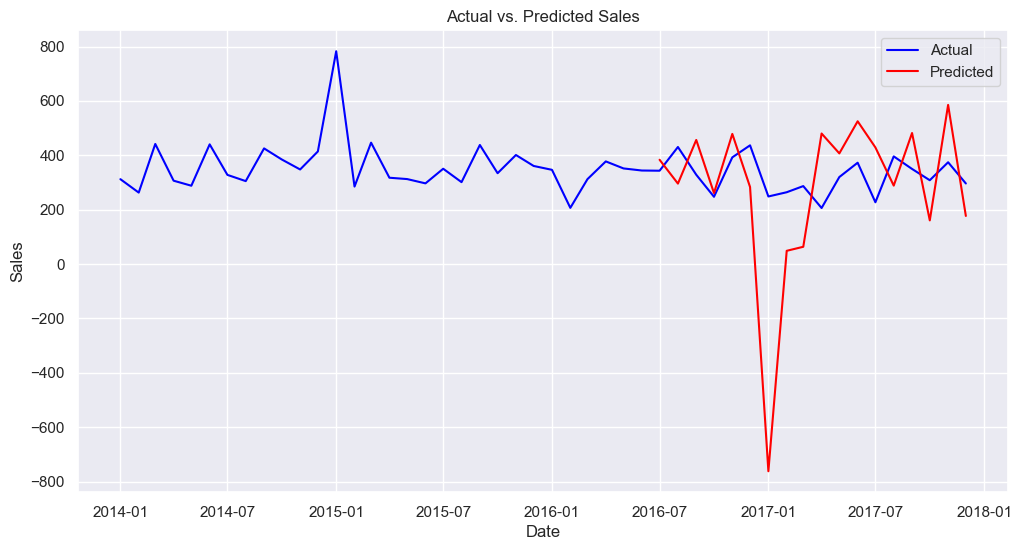

In [238]:
actual_values = df_monthly['Sales']
df_monthly['forecast'] = result.predict(start=30, end = 48, dynamic=True)
predicted_values = df_monthly['forecast']
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, actual_values, label='Actual', color='blue')
plt.plot(df_monthly.index, predicted_values, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title('Actual vs. Predicted Sales')
plt.show()


In [241]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,374.195768,350.534979,514.381949,374.195768,374.195768,51.181371,51.181371,51.181371,51.181371,51.181371,51.181371,0.0,0.0,0.0,425.377139
1,2014-02-01,372.479795,217.129491,389.599669,372.479795,372.479795,-69.786067,-69.786067,-69.786067,-69.786067,-69.786067,-69.786067,0.0,0.0,0.0,302.693728
2,2014-03-01,370.929884,336.538612,504.908472,370.929884,370.929884,49.241729,49.241729,49.241729,49.241729,49.241729,49.241729,0.0,0.0,0.0,420.171614
3,2014-04-01,369.213911,236.460670,406.519773,369.213911,369.213911,-44.230527,-44.230527,-44.230527,-44.230527,-44.230527,-44.230527,0.0,0.0,0.0,324.983384
4,2014-05-01,367.553293,258.579189,426.692081,367.553293,367.553293,-25.398781,-25.398781,-25.398781,-25.398781,-25.398781,-25.398781,0.0,0.0,0.0,342.154512
5,2014-06-01,365.837320,312.038767,474.679787,365.837320,365.837320,27.849048,27.849048,27.849048,27.849048,27.849048,27.849048,0.0,0.0,0.0,393.686367
6,2014-07-01,364.176701,268.741288,432.162357,364.176701,364.176701,-11.399300,-11.399300,-11.399300,-11.399300,-11.399300,-11.399300,0.0,0.0,0.0,352.777401
7,2014-08-01,362.460728,286.224850,451.576518,362.460728,362.460728,3.691409,3.691409,3.691409,3.691409,3.691409,3.691409,0.0,0.0,0.0,366.152137
8,2014-09-01,360.744755,346.504031,518.056047,360.744755,360.744755,72.825277,72.825277,72.825277,72.825277,72.825277,72.825277,0.0,0.0,0.0,433.570032
9,2014-10-01,359.084136,276.079546,441.653318,359.084136,359.084136,0.228266,0.228266,0.228266,0.228266,0.228266,0.228266,0.0,0.0,0.0,359.312402
